<a href="https://colab.research.google.com/github/rumeysates1/MovieReview-Sentiment-Analysis/blob/main/MovieReview_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [17]:
# Loading the Dataset
df = pd.read_csv('IMDB Dataset.csv')

In [18]:
# Get the first 5 lines
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Let's download the necessary tools from the NLTK library.
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # 1. Clear html tags
    text = re.sub(r'<.*?>', '', text)
    # 2. Just leave the letters out.
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 3. Convert to lowercase
    text = text.lower()
    # 4. Eliminate unnecessary words and get down to the root words.
    words = text.split()
    cleaned_words = [stemmer.stem(w) for w in words if w not in stopwords]

    return " ".join(cleaned_words)

# Applying the cleaning process to the entire table
df['review'] = df['review'].apply(clean_text)
print("Cleaning is finished!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning is finished!


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Let's convert the text into a mathematical matrix.
tfidf = TfidfVectorizer(max_features=5000) # Get the 5000 most important words.
X = tfidf.fit_transform(df['review'])

# Let's quantify the target variable (sentiment). (positive=1, negative=0)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model.
model = LogisticRegression()
model.fit(X_train, y_train)

# View success score
print(f"Model Accuracy Score: %{model.score(X_test, y_test)*100:.2f}")

Model Accuracy Score: %88.64


In [22]:
# Model predictions
y_pred = model.predict(X_test)

# Finding the indices of incorrectly predicted results.
# Captures the differences between y_test (actual value) and y_pred (prediction).
errors = (y_test != y_pred)

# It displays the top 3 comments that were incorrectly predicted.
print("--- SOME EXAMPLES WHERE THE MODEL WAS WRONG ---\n")

# Let's find the errors in X_test and go back to their original text (df['review']).
error_indices = y_test[errors].index[:3]

for idx in error_indices:
    print(f"True Feeling: {'Positive' if y.iloc[idx]==1 else 'Negative'}")
    print(f"Model Prediction: {'Positive' if y_pred[np.where(y_test.index == idx)[0][0]]==1 else 'Negative'}")
    print(f"Comment: {df['review'].iloc[idx][:200]}...") # Show the first 200 characters
    print("-" * 30)

--- SOME EXAMPLES WHERE THE MODEL WAS WRONG ---

True Feeling: Positive
Model Prediction: Negative
Comment: realli like summerslam due look arena curtain look overal interest reason anyway could one best summerslam ever wwf lex luger main event yokozuna time ok huge fat man vs strong man glad time chang ter...
------------------------------
True Feeling: Positive
Model Prediction: Negative
Comment: okay get purgatori thing first time watch episod seem like someth signific go put finger time costa mesa fire tv realli caught attent help write essay inferno let see discuss yet twop review mention t...
------------------------------
True Feeling: Positive
Model Prediction: Negative
Comment: movi start somewhat slowli get run toward end bad done illustr charact trait degress main charact consequ tragedi movi thought provok philosophi movi make worthwhil like dostoyevski crime punish proba...
------------------------------


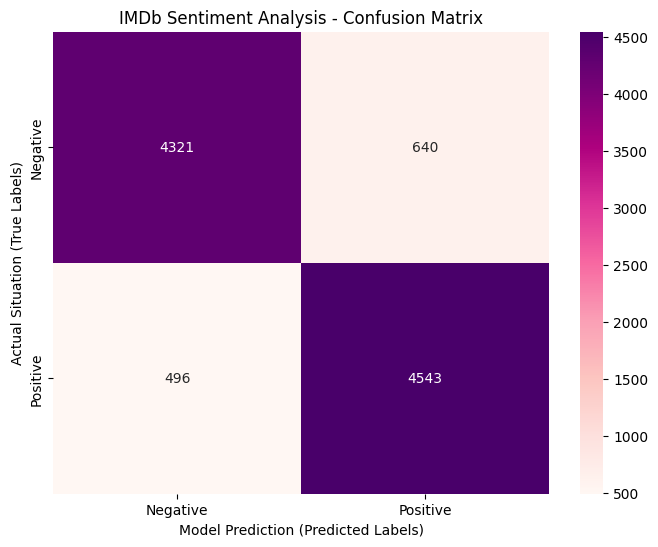

In [23]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Let's calculate the error matrix.
predictions = model.predict(X_test)
# y_test: Actual results, predictions: Model predictions
cm = confusion_matrix(y_test, predictions )

# 2. Visualization (Heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', #The RdPu color looks professional.
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Model Prediction (Predicted Labels)')
plt.ylabel('Actual Situation (True Labels)')
plt.title('IMDb Sentiment Analysis - Confusion Matrix')
plt.show()

In [24]:
my_review = "This movie was an absolute masterpiece! The acting was incredible."
# Clean and digitize
cleaned_my_review = clean_text(my_review)
vectorized_review = tfidf.transform([cleaned_my_review])

# Predict
prediction = model.predict(vectorized_review)

if prediction[0] == 1:
    print("Predict: Positive (Happy Customer) 😊")
else:
    print("Predict: Negative (not satisfied) 😞")

Predict: Positive (Happy Customer) 😊
